## Ficha 7_PLN 23/24
PG54023- Madalena Passos

In [1]:
import re
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


f1 = open("C:\\Users\\Carla Passos\\Desktop\\MIEBIOM\\PLN\\aulas\\documentos\\Harry_Potter_Camara_Secreta-br.txt", encoding="utf-8")
f2 = open("C:\\Users\\Carla Passos\\Desktop\\MIEBIOM\\PLN\\aulas\\documentos\\Harry_Potter_e_A_Pedra_Filosofal.txt", encoding="utf-8")

# Livro 1 - Harry_Potter_Camara_Secreta
harry_text1=f1.read()

tokens1=[]
linhas1=harry_text1.split("\n")

for linha in linhas1:
    #linha = re.sub(r"[!?\.]*", r"", linha)
    tokens1.append(word_tokenize(linha.lower()))
    #tokens.append(linha.split())

# Livro 2 - Harry_Potter_e_A_Pedra_Filosofal
harry_text2=f2.read()

tokens2=[]
linhas2=harry_text2.split("\n")

for linha in linhas2:
    tokens2.append(word_tokenize(linha.lower()))

# Junção dos dois livros
tokensLM=[]
texto_compilado=harry_text1 + "\n" + harry_text2
texto_compilado_linhas=texto_compilado.split("\n")

for linha in texto_compilado_linhas:
    tokensLM.append(word_tokenize(linha.lower()))


C:\Users\Carla Passos\anaconda3\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Criar modelo para o livro 1
model1=Word2Vec(tokens1, vector_size=300, window=5, min_count=1, sg=1, epochs=22, workers=3)
model1.save("HP1word2vec.model")

In [3]:
# Criar modelo para livro 2
model2=Word2Vec(tokens2, vector_size=300, window=5, min_count=1, sg=1, epochs=22, workers=3)
model2.save("HP2word2vec.model")

In [4]:
# Criar modelo para livro compilado
model3=Word2Vec(tokensLM, vector_size=300, window=5, min_count=1, sg=1, epochs=22, workers=3)
model3.save("HP_LC_word2vec.model")

In [5]:
# Verificar palavras mais associadas a Harry
v1=model1.wv.most_similar('harry')
print("------------- Livro 1 ------------\n",v1)
v2=model2.wv.most_similar('harry')
print("------------- Livro 2 ------------\n",v2)
vLC=model3.wv.most_similar('harry')
print("------------- Livro Compilado ------------\n",vLC)

------------- Livro 1 ------------
 [('desesperado', 0.5734260082244873), ('mudando', 0.5578562617301941), ('portão', 0.5530917644500732), ('cujos', 0.5513190031051636), ('manhoso', 0.5506564378738403), ('autorização', 0.5489460825920105), ('abruptamente', 0.5484536290168762), ('evitá-lo', 0.5483723282814026), ('controlar', 0.5483363270759583), ('ansiosa', 0.5465202331542969)]
------------- Livro 2 ------------
 [('rony', 0.5851518511772156), ('firenze', 0.5761771202087402), ('levando-o', 0.5729517936706543), ('lentamente', 0.5703909397125244), ('desvencilhar', 0.5671396255493164), ('seca', 0.5611169934272766), ('alegria', 0.5589391589164734), ('contava', 0.5585637092590332), ('uau', 0.5580956339836121), ('escondendo', 0.5575087666511536)]
------------- Livro Compilado ------------
 [('sonolento', 0.5497577786445618), ('firenze', 0.5339052677154541), ('desanimar', 0.5226432085037231), ('portão', 0.5211529731750488), ('manhoso', 0.5193026661872864), ('esticando-se', 0.518942654132843), 

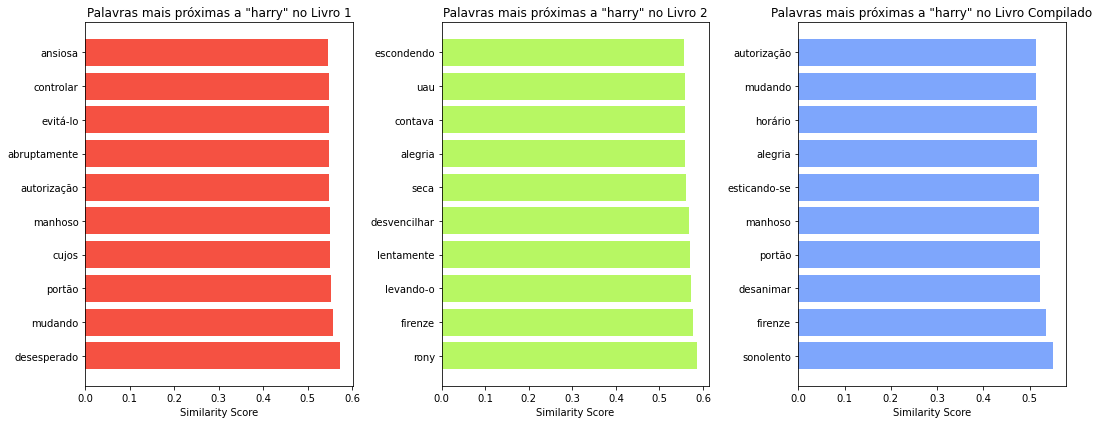

In [6]:
import matplotlib.pyplot as plt

words1, sims1 = zip(*v1)
words2, sims2 = zip(*v2)
wordsLC, simsLC = zip(*vLC)

# Gráfico
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.barh(words1, sims1, color='#f55142')
plt.xlabel('Similarity Score')
plt.title('Palavras mais próximas a "harry" no Livro 1')

plt.subplot(1, 3, 2)
plt.barh(words2, sims2, color='#b7f763')
plt.xlabel('Similarity Score')
plt.title('Palavras mais próximas a "harry" no Livro 2')

plt.subplot(1, 3, 3)
plt.barh(wordsLC, simsLC, color='#7ea6fc')
plt.xlabel('Similarity Score')
plt.title('Palavras mais próximas a "harry" no Livro Compilado')

plt.tight_layout()
plt.show()

In [7]:
# Verificar palavras mais associadas a serpente

v1=model1.wv.most_similar('serpente')
print("------------- Livro 1 ------------\n",v1)
v2=model2.wv.most_similar('serpente')
print("------------- Livro 2 ------------\n",v2)
vLC=model3.wv.most_similar('serpente')
print("------------- Livro Compilado ------------\n",vLC)

------------- Livro 1 ------------
 [('açulou', 0.9111806154251099), ('símbolo', 0.9056043028831482), ('furara', 0.9038861393928528), ('construiu', 0.8992632031440735), ('ligado', 0.8951857089996338), ('raro', 0.8940082788467407), ('internacional', 0.8916890621185303), ('confederação', 0.8835007548332214), ('provas', 0.8834303021430969), ('fecho', 0.882946252822876)]
------------- Livro 2 ------------
 [('cálices', 0.951727032661438), ('inverno', 0.9500989317893982), ('irregulares', 0.9441525936126709), ('pegajoso', 0.9438872933387756), ('lascadas', 0.9427000880241394), ('neve', 0.9421921968460083), ('serpeava', 0.9420275092124939), ('fresca', 0.9416079521179199), ('xerez', 0.9414944648742676), ('turistas', 0.9402651190757751)]
------------- Livro Compilado ------------
 [('açulou', 0.8179201483726501), ('bandeira', 0.8101217150688171), ('liga', 0.8074361085891724), ('leão', 0.7935207486152649), ('furara', 0.7913514971733093), ('encolhiam', 0.7871251106262207), ('escova', 0.78310918807

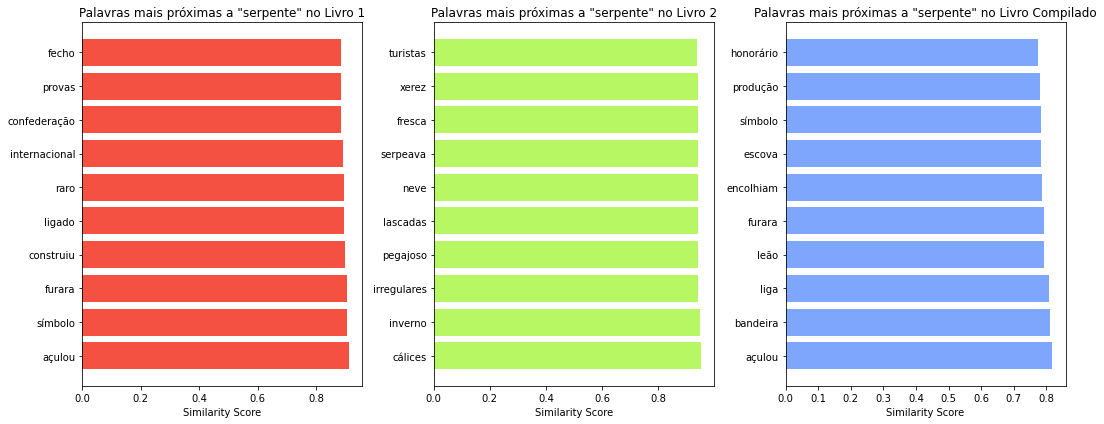

In [8]:
import matplotlib.pyplot as plt

words1, sims1 = zip(*v1)
words2, sims2 = zip(*v2)
wordsLC, simsLC = zip(*vLC)

# Gráfico
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.barh(words1, sims1, color='#f55142')
plt.xlabel('Similarity Score')
plt.title('Palavras mais próximas a "serpente" no Livro 1')

plt.subplot(1, 3, 2)
plt.barh(words2, sims2, color='#b7f763')
plt.xlabel('Similarity Score')
plt.title('Palavras mais próximas a "serpente" no Livro 2')

plt.subplot(1, 3, 3)
plt.barh(wordsLC, simsLC, color='#7ea6fc')
plt.xlabel('Similarity Score')
plt.title('Palavras mais próximas a "serpente" no Livro Compilado')

plt.tight_layout()
plt.show()

In [9]:
# Verificar as associações harry/você-sabe-quem e hermione/rony nos dois livros

pares=[('harry', 'você-sabe-quem'), ('hermione', 'rony')]

print("--------Livro 1--------")
for w1, w2 in pares:
    print('%s \t %s \t% .2f' %(w1, w2, model1.wv.similarity(w1, w2)))

print("--------Livro 2--------")
for w1, w2 in pares:
    print('%s \t %s \t% .2f' %(w1, w2, model2.wv.similarity(w1, w2)))
    
print("--------Livro Compilado--------")
for w1, w2 in pares:
    print('%s \t %s \t% .2f' %(w1, w2, model3.wv.similarity(w1, w2)))

--------Livro 1--------
harry 	 você-sabe-quem 	 0.47
hermione 	 rony 	 0.42
--------Livro 2--------
harry 	 você-sabe-quem 	 0.34
hermione 	 rony 	 0.51
--------Livro Compilado--------
harry 	 você-sabe-quem 	 0.29
hermione 	 rony 	 0.33


In [10]:
# Averiguar o "intruso"

v1=model1.wv.doesnt_match(["harry", "frigideira", "voldemort"])
print("--------Livro 1--------\n", v1)

v2=model2.wv.doesnt_match(["harry", "frigideira", "voldemort"])
print("--------Livro 2--------\n", v2)

v3=model3.wv.doesnt_match(["harry", "frigideira", "voldemort"])
print("--------Livro Compilado--------\n", v3)

--------Livro 1--------
 voldemort
--------Livro 2--------
 harry
--------Livro Compilado--------
 voldemort


In [11]:
# Averiguar a relação entre harry e rony sem hermione

v1=model1.wv.most_similar(positive=["harry", "rony"], negative=["hermione"])
print("--------Livro 1--------\n", v1[0])

v2=model2.wv.most_similar(positive=["harry", "rony"], negative=["hermione"])
print("--------Livro 2--------\n", v2[0])

v3=model3.wv.most_similar(positive=["harry", "rony"], negative=["hermione"])
print("--------Livro Compilado--------\n", v3[0])

--------Livro 1--------
 ('satisfeito', 0.4344090521335602)
--------Livro 2--------
 ('firenze', 0.404512494802475)
--------Livro Compilado--------
 ('repente', 0.40261217951774597)


In [12]:
# Averiguar analogia mais forte entre harry e rony sem hermione

def analogy(x2, y1, x1, mX):
    model=mX
    result=model.wv.most_similar(positive=[y1, x2], negative=[x1])
    return (result[0][0])

In [13]:
print("--------Livro 1--------\n", analogy("harry","rony","hermione",model1))
print("--------Livro 2--------\n", analogy("harry","rony","hermione",model2))
print("--------Livro Compilado--------\n", analogy("harry","rony","hermione",model3))

--------Livro 1--------
 satisfeito
--------Livro 2--------
 firenze
--------Livro Compilado--------
 repente
